### 1.- Instalar/Cargar Librerías
#### Esta es la lista de librerías utilizadas:
* **Party:** Necesaria para la elaboración del árbol de desición
* **Ggplot:** Graficas mejoradas
* **Rpart:** Árbol de desiciones (Recursive partitioning)
* **rpart.plot:** Necesarias para fancy plot
* **RColorBrewer:** Necesarias para fancy plot


**Nota:** *Si la librería no es parte del entorno de trabajo, será necesario ejecutar:*
```#install.packages(librería)```

In [59]:
# Load libreries
library(party)
require(ggplot2)
require(rpart)
library(rattle)
library(rpart.plot)
library(RColorBrewer)

### 2.- Cargar el conjunto de datos (Data Set)
#### Una inspección breve se puede realizar utilizando **head** y **tail**:

In [64]:
# Load csv file
titanic <- read.csv("titanic_clean.csv", header = TRUE, sep = ",")
# Clean data set
titanic <- titanic[-1310,] # Last data does not contain relevant info

### 3.- Características de los pasajeros
#### Con la ayuda de **summary** , obtenemos info relevante de nuestros sujetos de análisis, las columnas a evaluarse fueron:
* **Edad**
* **Costo del boleto**

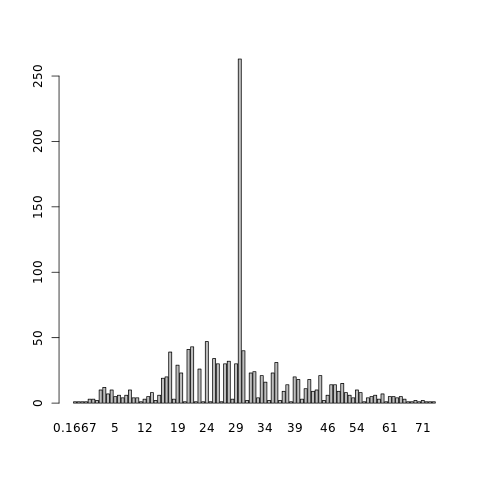

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1667 22.0000 29.8800 29.8800 35.0000 80.0000 

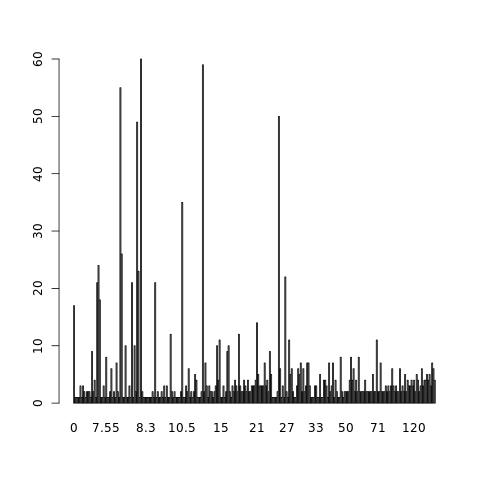

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   7.896  14.450  33.300  31.280 512.300       1 

In [65]:
plot(factor(titanic$age))
summary(titanic$age)
plot(factor(titanic$fare))
summary(titanic$fare)

**Información útil:** Gracias a este pequeño resumen estadísticos, podemos observar que el mayor sector de la población se encontraba en el rango de edades de **18** a **30** años de edad.

### 4.- Árbol de desiciones I 
#### Siguiendo los pasos de tutorial point y de acuerdo a la siguiente fórmula: 
**sobrevivencia** ~ ( **clase** + **sexo** + **edad** )

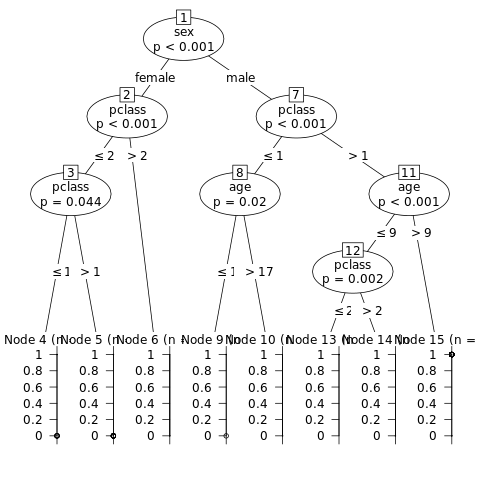

In [66]:
# Create the tree.
tree_tp <- ctree( survived ~  pclass + sex + age , data = titanic)
# Plot the tree.
plot(tree_tp)

### 5.- Árbol de desiciones II 
#### Utilizando fancyRpartPlot: 
Puntos a destacar:
* Se utilizó el color verde para resaltar la supervivencia y rojo para el contrario
* Esta versión contiene porcentajes para cada uno de los caminos que se siguen en el árbol. 

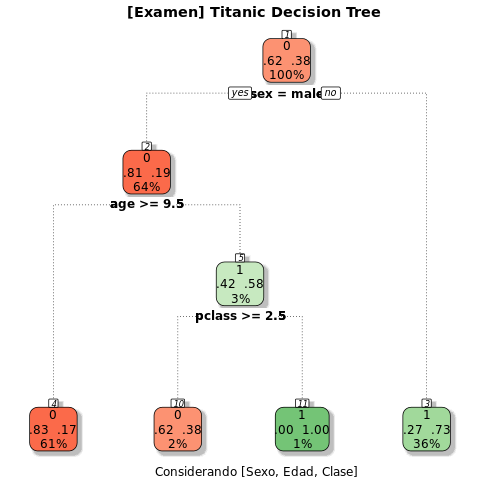

In [67]:
# Build the decision tree
tree_qr <- rpart(survived ~ pclass + sex + age, data = titanic, method = "class")
fancyRpartPlot(tree_qr, main = "[Examen] Titanic Decision Tree\n\n", 
  sub = " Considerando [Sexo, Edad, Clase]",
  palettes = c("Reds", "Greens"))

**Conclusión:** Desde el primer nodo podemos notar que la mayor población de sobrevivientes fueron en su mayoría mujeres, o niños mayores de 10 años.

### 6.- Regresiones líneales

#### 6.1.- Sobrevivientes vs Edad


Call:
lm(formula = titanic$survived ~ titanic$age, data = titanic)

Coefficients:
(Intercept)  titanic$age  
   0.438563    -0.001894  



Call:
lm(formula = titanic$survived ~ titanic$age, data = titanic)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4379 -0.3836 -0.3647  0.6069  0.7129 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.438563   0.033913  12.932   <2e-16 ***
titanic$age -0.001894   0.001042  -1.817   0.0694 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4856 on 1307 degrees of freedom
Multiple R-squared:  0.00252,	Adjusted R-squared:  0.001757 
F-statistic: 3.302 on 1 and 1307 DF,  p-value: 0.06943


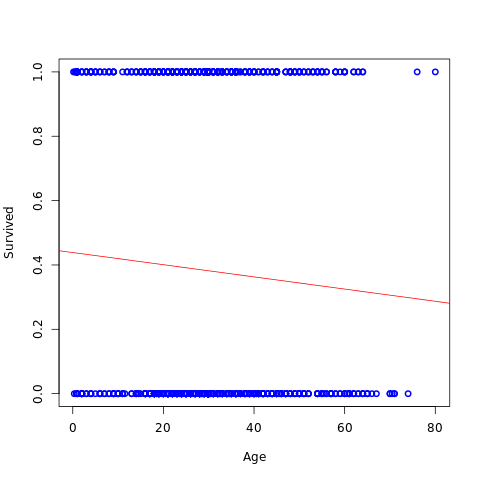

In [83]:
# Build a linear model
age_model <- lm(titanic$survived ~ titanic$age, data=titanic)
age_model
summary(age_model)
{
  plot(titanic$age, titanic$survived, xlab = "Age", ylab = "Survived", col = "blue", lwd = 2)
  abline(age_model, col = "red")
}

** Conclusiones:** Con un valor de p-value <= 0.05 podríamos decir que nuestro modelo es fiel al cambio, pero no es el caso (*p-value: 0.06943*), por otro lado un valor bajo de **MRS** indica que nuestro modelo no hace tan buen ajuste con los datos. 

#### 6.2.- Sobrevivientes vs Clase


Call:
lm(formula = titanic$survived ~ titanic$pclass, data = titanic)

Coefficients:
   (Intercept)  titanic$pclass  
        0.7980         -0.1813  



Call:
lm(formula = titanic$survived ~ titanic$pclass, data = titanic)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6167 -0.2541 -0.2541  0.3833  0.7459 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.79797    0.03724   21.43   <2e-16 ***
titanic$pclass -0.18127    0.01524  -11.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4619 on 1307 degrees of freedom
Multiple R-squared:  0.09764,	Adjusted R-squared:  0.09695 
F-statistic: 141.4 on 1 and 1307 DF,  p-value: < 2.2e-16


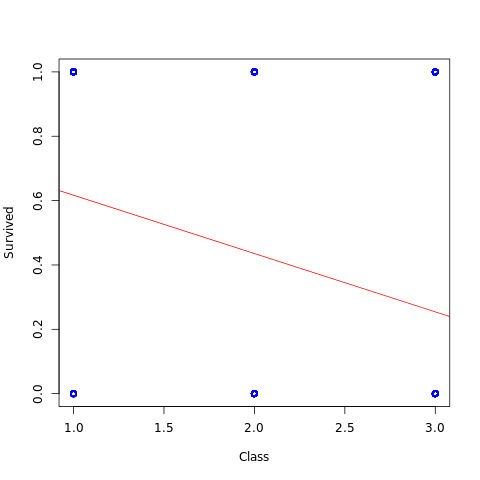

In [84]:
# Build a linear model
class_model <- lm(titanic$survived ~ titanic$pclass, data=titanic)
class_model
summary(class_model)
{
  plot(titanic$pclass, titanic$survived, xlab = "Class", ylab = "Survived", col = "blue", lwd = 2)
  abline(class_model, col = "red")
}

** Conclusiones:** Para este modelo se ha mejorado ambos aspectos, **MRS** y **p-value**, por lo cual podemos ver que existe fuerte relación entre la supervivencia y la clase en la que viajaban los pasajeros.

#### 6.3.- Sobrevivientes vs Sexo


Call:
lm(formula = titanic$survived ~ titanic$sex, data = titanic)

Coefficients:
    (Intercept)  titanic$sexmale  
         0.7275          -0.5365  



Call:
lm(formula = titanic$survived ~ titanic$sex, data = titanic)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7275 -0.1910 -0.1910  0.2725  0.8090 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.72747    0.01912   38.05   <2e-16 ***
titanic$sexmale -0.53648    0.02382  -22.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4127 on 1307 degrees of freedom
Multiple R-squared:  0.2795,	Adjusted R-squared:  0.279 
F-statistic: 507.1 on 1 and 1307 DF,  p-value: < 2.2e-16


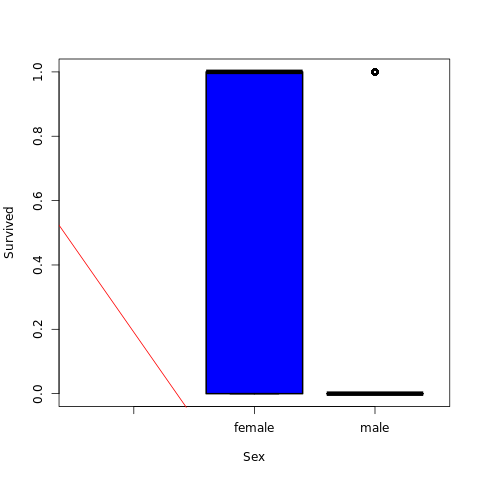

In [85]:
# Build a linear model
sex_model <- lm(titanic$survived ~ titanic$sex, data=titanic)
sex_model
summary(sex_model)
{
  plot(titanic$sex, titanic$survived, xlab = "Sex", ylab = "Survived", col = "blue", lwd = 2)
  abline(sex_model, col = "red")
}

** Conclusiones:** Buen valor de **p-value** pero con un **MRS** algo bajo.